<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/CP_VRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Developed by Alireza Soroudi
alireza.soroudi@gmail.com

Linkedin News letter : https://www.linkedin.com/newsletters/optimization-in-open-source-6874020019009859585/

Git hub: https://github.com/OptimizationExpert/Pyomo

In [1]:
import pandas as pd
!pip install ortools
from ortools.sat.python import cp_model
import matplotlib.pyplot as plt # Data visualization
import random
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 5.27.0 which is incompatible.
google-ai-generativelanguage 0.6.4 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protob

{1: (0.5, 0.5, 0),
 2: (0.3356902724410392, 0.35402950866796, 6),
 3: (0.19075849920762578, 0.4828436546709448, 13),
 4: (0.7523793760843338, 0.7332219118998008, 6),
 5: (0.9400406929114714, 0.9497844412319609, 2),
 6: (0.9503457865017877, 0.9157083010246634, 20),
 7: (0.8853568651340921, 0.004456064377464264, 7),
 8: (0.1323953068966175, 0.17325149000388618, 14),
 9: (0.1710856422379603, 0.643330908001697, 9),
 10: (0.0776742577023658, 0.399384964374362, 14),
 11: (0.662641167454376, 0.6468515265015242, 6),
 12: (0.5540121135221737, 0.6326551716722639, 3),
 13: (0.6299270781500035, 0.3291946371158887, 7),
 14: (0.37431663468653986, 0.21316268495615276, 12),
 15: (0.9874020443162815, 0.2102399308567583, 4),
 16: (0.5590430243385026, 0.55155154209678, 7),
 17: (0.6957140155927833, 0.867469711810148, 12),
 18: (0.33909854634158, 0.9734651536796273, 3),
 19: (0.18427138682457567, 0.015314136281267099, 17),
 20: (0.5399662727376311, 0.012195976459580482, 2),
 21: (0.7956369708607832, 0.085

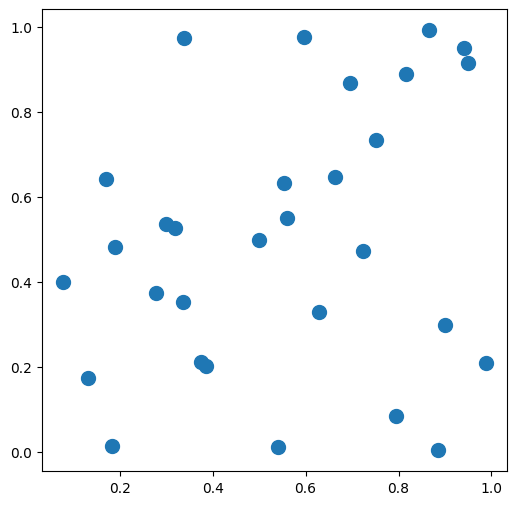

In [2]:
n = 30
depot = 1
nodes = [i for i in range(1,1+n)]
data = {}
for n in nodes:
  data[n]=(random.random(),random.random(), random.randint(1,20))
data[depot]=(0.5, 0.5,0)
cars = range(4)
plt.figure(figsize=(6,6))
X= [data[n][0] for n in nodes]
Y= [data[n][1] for n in nodes]
plt.scatter(X,Y,s=100)
data

In [3]:
def distance(n:int,m:int,data:dict)-> int:
  x1,y1 = data[n][0],data[n][1]
  x2,y2 = data[m][0],data[m][1]
  return int(100*np.sqrt( (x1-x2)**2+(y1-y2)**2))

distance(1,2,data)
print(nodes)

check = sum(data[n][2] for n in nodes)
print(check)

KOLORS = ['r','k','b','g']

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
282


0 100
1 90
2 30
3 70
Min of objective function: 794.0

1 0
1 1
1 2
1 3
2 0
3 0
4 1
5 0
6 0
7 1
8 3
9 0
10 1
11 1
12 0
13 3
14 3
15 1
16 1
17 1
18 1
19 3
20 1
21 1
22 2
23 0
24 0
25 0
26 0
27 2
28 3
29 1
30 0


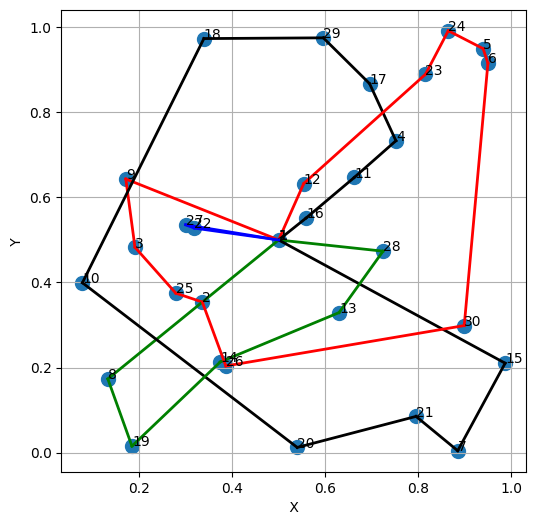

In [6]:
def main() -> None:
    # Creates the model.
    cap = {0:100, 1:190, 2:130, 3:70}

    model = cp_model.CpModel()
    x={(i,j,c):model.NewBoolVar(f"flow_{i}_{j}_{c}") for i in nodes
       for j in nodes for c in cars if i!=j}
    assign = {(i,c): model.NewBoolVar(f"assign_{i}_{c}") for i in nodes for c in cars}
    used_car = {c: model.NewBoolVar(f"used_{c}") for c in cars}

    for i in nodes:
      expressions = [assign[i,c] for c in cars]
      model.AddAtLeastOne(expressions)

    for (i,c),v in assign.items():
      model.Add(v<=used_car[c])


    for c in cars:
      model.Add(assign[depot,c]==used_car[c])
      arcs= [ (i,j,v) for (i,j,cc),v in x.items() if cc == c] + [(i,i,assign[i,c].Not()) for i in nodes]
      model.AddCircuit(arcs)


      expressions = [v*data[i][2] for (i,cc),v in assign.items() if c ==cc]
      model.Add(sum(expressions) <= cap[c])
      print(c,cap[c])

    expressions_of = [distance(i,j,data)* v for (i,j,c),v in x.items() ]
    model.minimize(sum(expressions_of))

    # Creates a solver and solves the model.
    solver = cp_model.CpSolver()
    solver.parameters.max_time_in_seconds = 90
    status = solver.solve(model)

    if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
        print(f"Min of objective function: {solver.objective_value}\n")
        plt.figure(figsize=(6,6))
        X= [data[n][0] for n in nodes]
        Y= [data[n][1] for n in nodes]
        plt.scatter(X,Y,s=100)

        for (i,c),v in assign.items():
          if solver.value(v)>0:
            print(i,c)

        for (i,j,c),v in x.items():
          if solver.value(v)>0:
              x1,y1 = data[i][0],data[i][1]
              x2,y2 = data[j][0],data[j][1]
              plt.plot([x1,x2],[y1,y2], lw=2, c=KOLORS[c])
              plt.text(x1,y1,s=str(i))

        plt.xlabel(' X ')
        plt.ylabel(' Y ')
        plt.grid()

    else:
        print("No solution found.")

if __name__ == "__main__":
    main()